In [1]:
#importing the relevant libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')


## Importing the dataset

In [2]:
df=pd.read_csv(r'C:\Users\kunalverma\Downloads\survey.csv')
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


## Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

- In entirety, the dataset has 1259 records, spread across 27 columns

## Finding and treating the missing values

In [4]:
round(df.isnull().sum()*100/len(df),2)

Timestamp                     0.00
Age                           0.00
Gender                        0.00
Country                       0.00
state                        40.91
self_employed                 1.43
family_history                0.00
treatment                     0.00
work_interfere               20.97
no_employees                  0.00
remote_work                   0.00
tech_company                  0.00
benefits                      0.00
care_options                  0.00
wellness_program              0.00
seek_help                     0.00
anonymity                     0.00
leave                         0.00
mental_health_consequence     0.00
phys_health_consequence       0.00
coworkers                     0.00
supervisor                    0.00
mental_health_interview       0.00
phys_health_interview         0.00
mental_vs_physical            0.00
obs_consequence               0.00
comments                     86.97
dtype: float64

- Rather than imputing/ removing records, we shall drop the columns 'state' and 'comments', having 40% and 85% missing data points and go on imputing 'self_employed' and 'work_interference'

In [5]:
# dropping 'state' and 'comments' from the dataframe 
df.drop(columns= ['state', 'comments'], inplace=True)

In [6]:
# Imputing missing data for 'self_employed' column
print(df['self_employed'].value_counts())
df['self_employed'].fillna('No', inplace=True)

No     1095
Yes     146
Name: self_employed, dtype: int64


In [7]:
print(df['work_interfere'].value_counts())
df['work_interfere'].fillna('Sometimes', inplace=True)

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64


In [8]:
round(df.isnull().sum()*100/len(df),2)

Timestamp                    0.0
Age                          0.0
Gender                       0.0
Country                      0.0
self_employed                0.0
family_history               0.0
treatment                    0.0
work_interfere               0.0
no_employees                 0.0
remote_work                  0.0
tech_company                 0.0
benefits                     0.0
care_options                 0.0
wellness_program             0.0
seek_help                    0.0
anonymity                    0.0
leave                        0.0
mental_health_consequence    0.0
phys_health_consequence      0.0
coworkers                    0.0
supervisor                   0.0
mental_health_interview      0.0
phys_health_interview        0.0
mental_vs_physical           0.0
obs_consequence              0.0
dtype: float64

# Exploratory Data Analysis

## Univariate Analysis

### Age Analysis

In [9]:
df.describe(percentiles=[.01,.1,.25,.5,.75,.9,.99]).astype(int)

,Age
count,1259
mean,79428148
std,-2147483648
min,-1726
1%,18
10%,24
25%,27
50%,31
75%,36
90%,42


- Since any age in the negative or above 100 is unrealistic, we can let go of those records. Also, we can floor the age to 18, since the given analysis is for working professionals

<AxesSubplot:xlabel='Age', ylabel='count'>

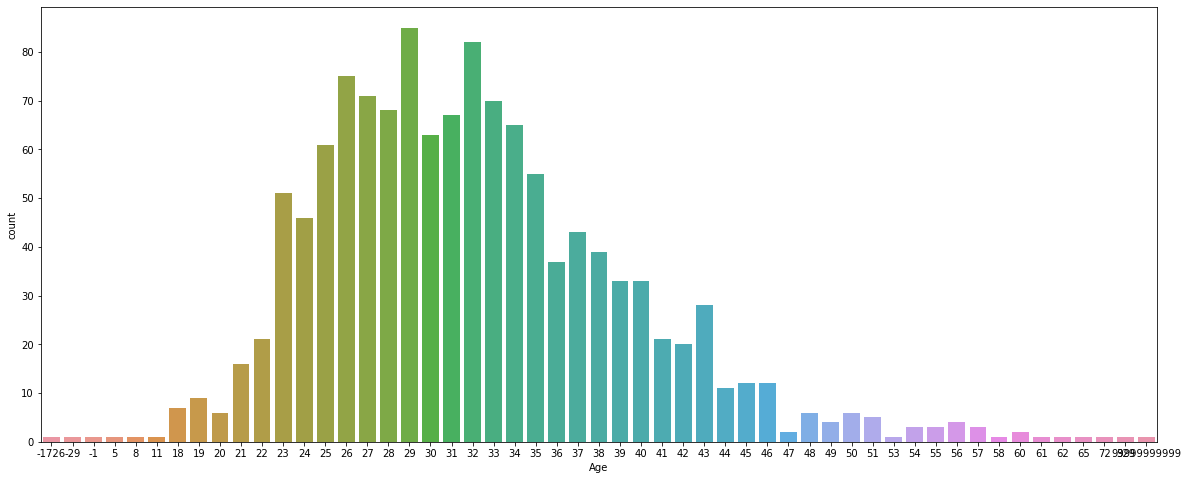

In [10]:
plt.figure(figsize=(20,8))
sns.countplot(df.Age, data=df)

In [11]:
df= df[(df['Age']>18) & (df['Age']<100)]
df.shape

(1244, 25)

<AxesSubplot:xlabel='Age', ylabel='Density'>

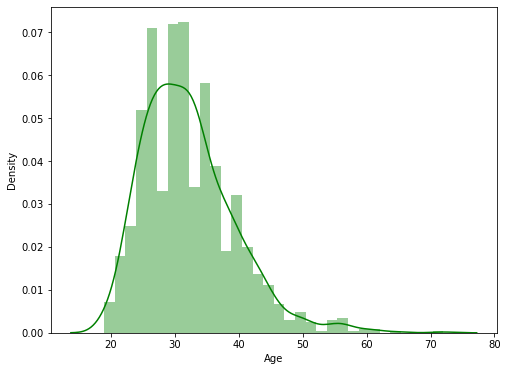

In [12]:
plt.figure(figsize=(8,6))
sns.distplot(df.Age, hist=True, color='green')

- The age is centered around 30

### Gender Analysis

In [13]:
print(df.Gender.unique())

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'Cis Male' 'Woman' 'f' 'Mal' 'Male (CIS)'
 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah' 'Enby'
 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender' 'cis-female/femme'
 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male ' 'Man' 'Trans woman'
 'msle' 'Neuter' 'Female (trans)' 'queer' 'Female (cis)' 'Mail' 'cis male'
 'Malr' 'femail' 'Cis Man'
 'ostensibly male, unsure what that really means']


- Encoding the gender values to 'Male', 'Female', and 'Others

In [14]:
df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Others', inplace = True)

<AxesSubplot:>

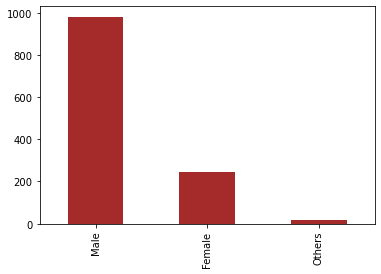

In [15]:
df.Gender.value_counts().plot.bar(color='Brown')

### Country-wise Analysis

In [16]:
df.Country.value_counts(normalize=True)*100

United States             59.726688
United Kingdom            14.710611
Canada                     5.787781
Germany                    3.617363
Ireland                    2.170418
Netherlands                2.090032
Australia                  1.688103
France                     1.045016
India                      0.803859
New Zealand                0.643087
Italy                      0.562701
Sweden                     0.562701
Poland                     0.562701
Switzerland                0.562701
Brazil                     0.482315
Belgium                    0.482315
South Africa               0.482315
Israel                     0.401929
Bulgaria                   0.321543
Singapore                  0.321543
Austria                    0.241158
Mexico                     0.241158
Colombia                   0.160772
Croatia                    0.160772
Finland                    0.160772
Portugal                   0.160772
Russia                     0.160772
Denmark                    0

- Apparently, no specific conclusion can be made from the analysis point of view for country variable as 60% of respondents are from the US.

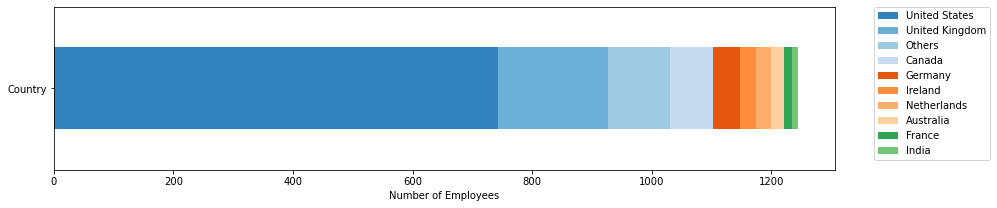

In [17]:
df.loc[df.Country.value_counts()[df.Country].values < 10, 'Country'] = "Others"
labels = df.Country.unique().tolist()
sns.set_palette("tab20c")
plt.rcParams["figure.figsize"] = (14, 3)
ax = pd.DataFrame(df['Country'].value_counts()).T.plot(kind='barh', stacked=True)
ax.set_xlabel("Number of Employees")
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.0)
plt.show() 

<AxesSubplot:ylabel='leave'>

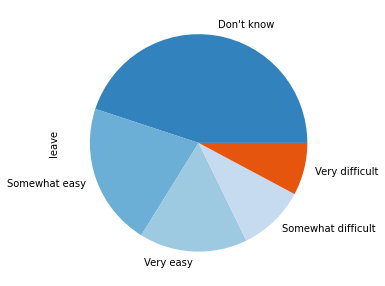

In [18]:
plt.figure(figsize=(6,5))
df.leave.value_counts().plot(kind='pie')

- Apart from a majority neutral response, decent number of employees find it easy to take a leave for a mental health condition

<AxesSubplot:xlabel='phys_health_consequence', ylabel='count'>

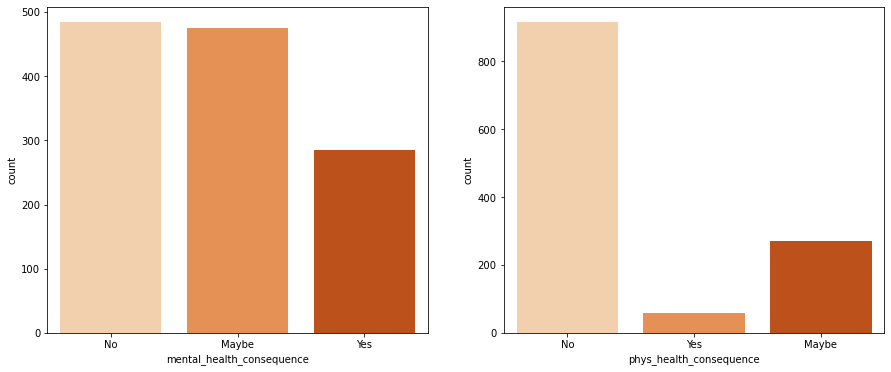

In [19]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(df['mental_health_consequence'], data=df, palette='Oranges')

plt.subplot(1,2,2)
sns.countplot(df['phys_health_consequence'], data=df, palette='Oranges')


- When it comes to discussing health condition with their employers, respondents don't feel it can have any negative consequence from their career point of view

In [20]:
df['mental_health_consequence'].value_counts()

No       484
Maybe    475
Yes      285
Name: mental_health_consequence, dtype: int64

In [21]:
df.leave.unique()

array(['Somewhat easy', "Don't know", 'Somewhat difficult',
       'Very difficult', 'Very easy'], dtype=object)

<AxesSubplot:xlabel='leave', ylabel='count'>

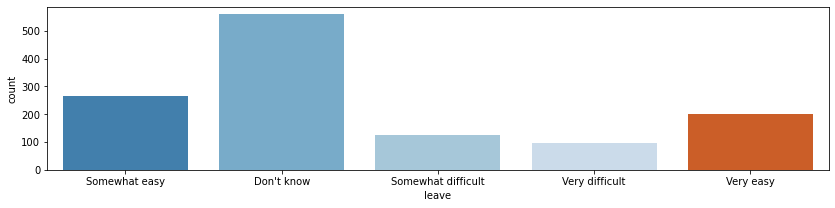

In [22]:
sns.countplot(df.leave, data=df)

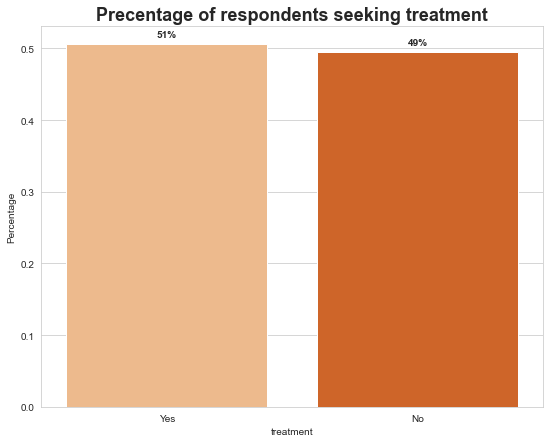

In [23]:
sns.set_style("whitegrid")
plt.figure(figsize = (9,7))
plt.title('Precentage of respondents seeking treatment', fontsize=18, fontweight='bold')
eda_percentage = df['treatment'].value_counts(normalize = True).rename_axis('treatment').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'treatment', y = 'Percentage', data = eda_percentage.head(10), palette='Oranges')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

In [24]:
df.treatment.value_counts()

Yes    629
No     615
Name: treatment, dtype: int64

In [25]:
df.shape

(1244, 25)

No handles with labels found to put in legend.


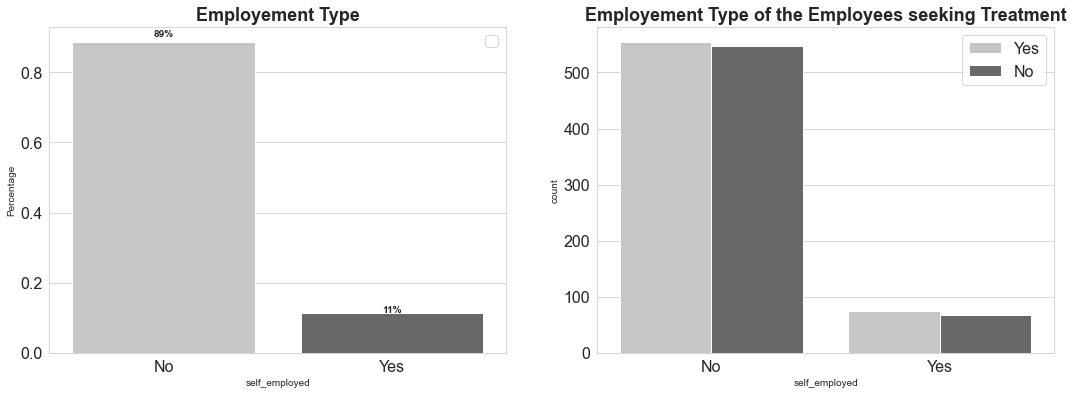

In [26]:
plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
eda_percentage = df['self_employed'].value_counts(normalize = True).rename_axis('self_employed').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'self_employed', y = 'Percentage', data = eda_percentage, palette = 'Greys')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Employement Type', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['self_employed'], hue = df['treatment'], palette = 'Greys')
plt.title('Employement Type of the Employees seeking Treatment',  fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.show()

No handles with labels found to put in legend.


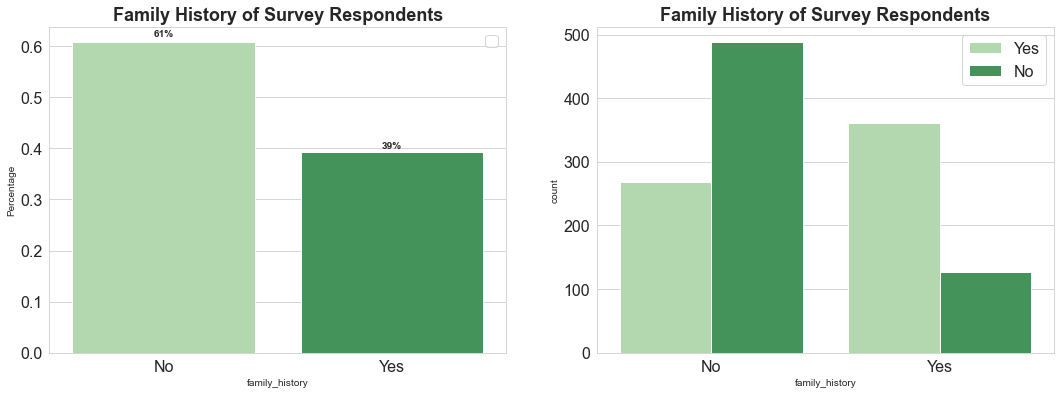

In [27]:
plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
eda_percentage = df['family_history'].value_counts(normalize = True).rename_axis('family_history').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'family_history', y = 'Percentage', data = eda_percentage, palette='Greens')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Family History of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['family_history'], hue = df['treatment'], palette='Greens')
plt.title('Family History of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

No handles with labels found to put in legend.


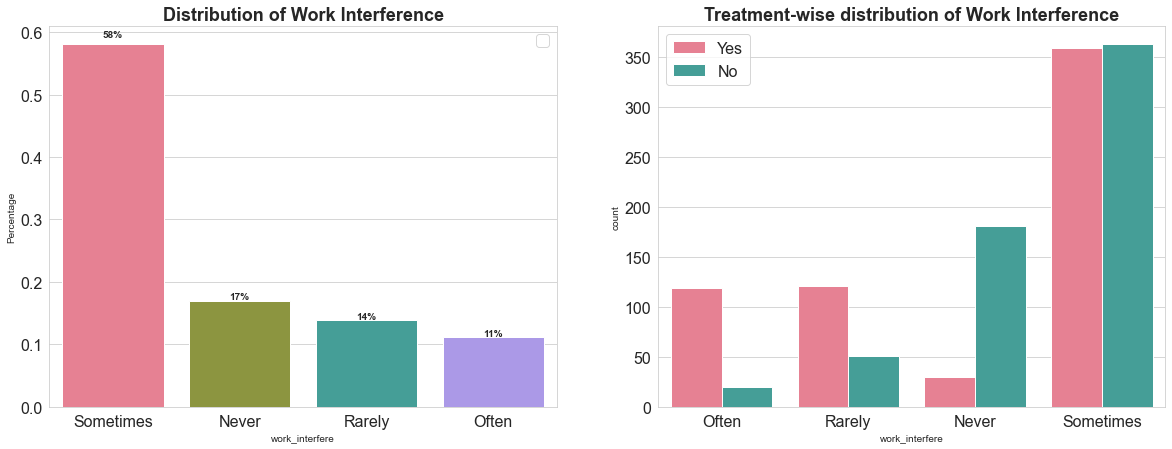

In [28]:
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
eda_percentage = df['work_interfere'].value_counts(normalize = True).rename_axis('work_interfere').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'work_interfere', y = 'Percentage', data = eda_percentage, palette='husl')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Distribution of Work Interference', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['work_interfere'], hue = df['treatment'], palette = 'husl')
plt.title('Treatment-wise distribution of Work Interference', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)


No handles with labels found to put in legend.


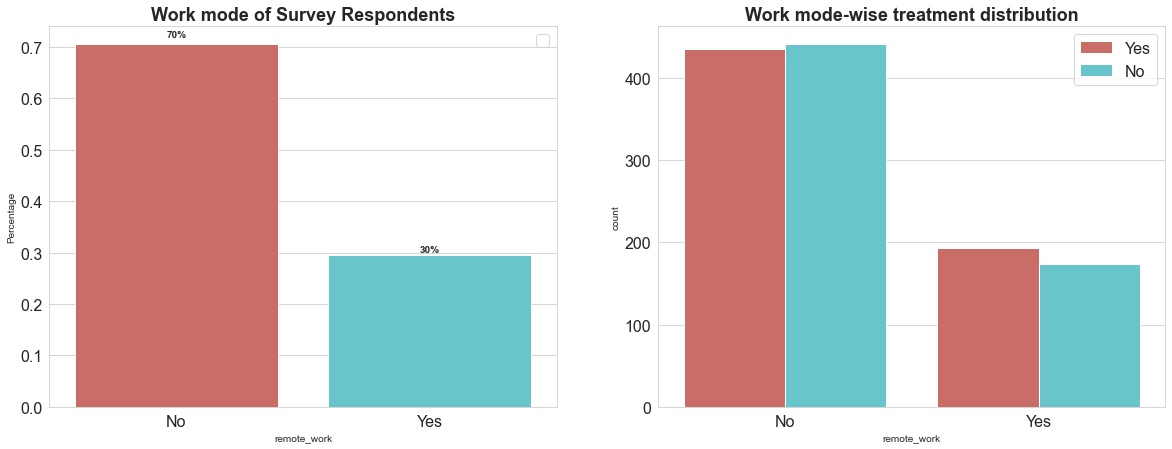

In [29]:
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
eda_percentage = df['remote_work'].value_counts(normalize = True).rename_axis('remote_work').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'remote_work', y = 'Percentage', data = eda_percentage, palette='hls')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Work mode of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['remote_work'], hue = df['treatment'], palette='hls')
plt.title('Work mode-wise treatment distribution', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

No handles with labels found to put in legend.


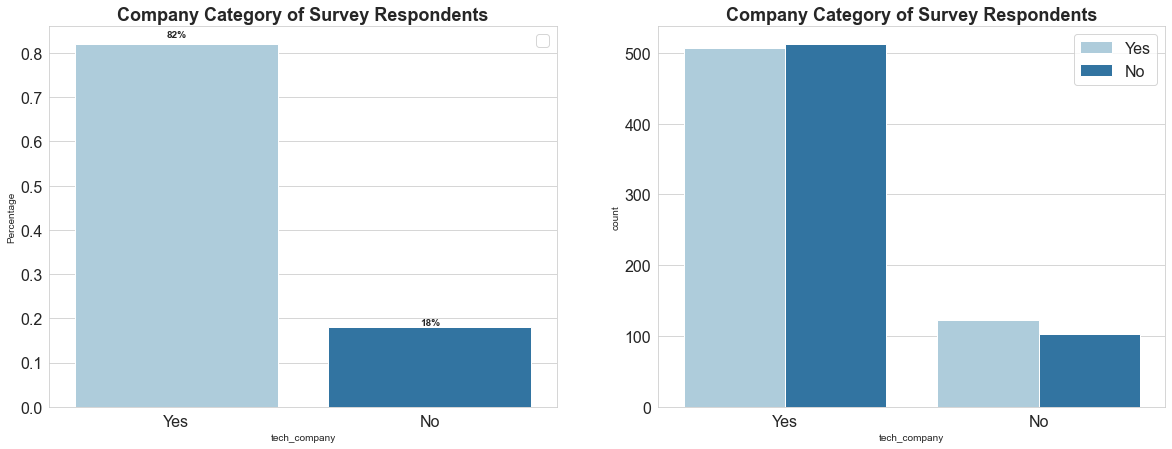

In [30]:
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
eda_percentage = df['tech_company'].value_counts(normalize = True).rename_axis('tech_company').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'tech_company', y = 'Percentage', data = eda_percentage, palette='Paired')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Company Category of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['tech_company'], hue = df['treatment'], palette='Paired')
plt.title('Company Category of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

No handles with labels found to put in legend.


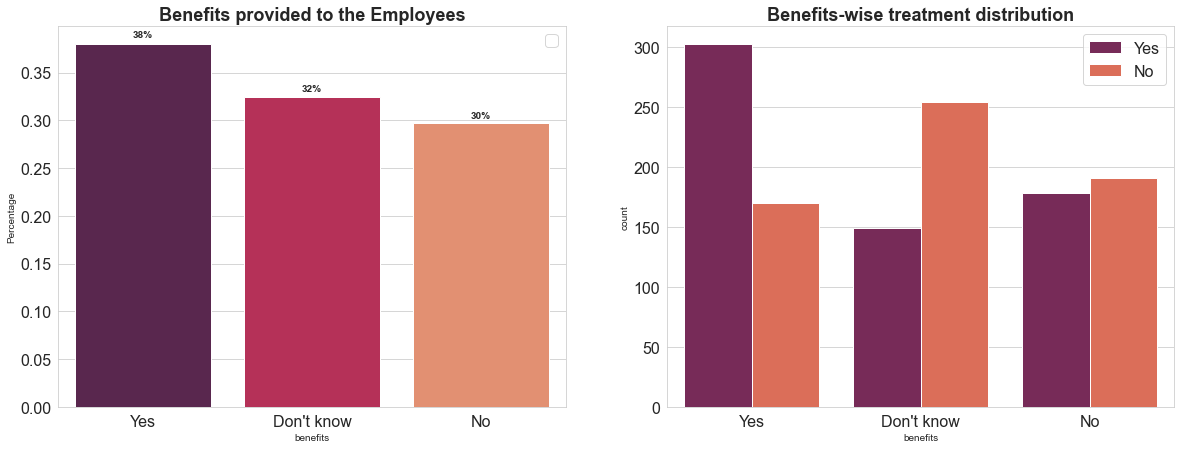

In [31]:
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
eda_percentage = df['benefits'].value_counts(normalize = True).rename_axis('benefits').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'benefits', y = 'Percentage', data = eda_percentage, palette='rocket')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Benefits provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['benefits'], hue = df['treatment'], palette='rocket')
plt.title('Benefits-wise treatment distribution', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

No handles with labels found to put in legend.


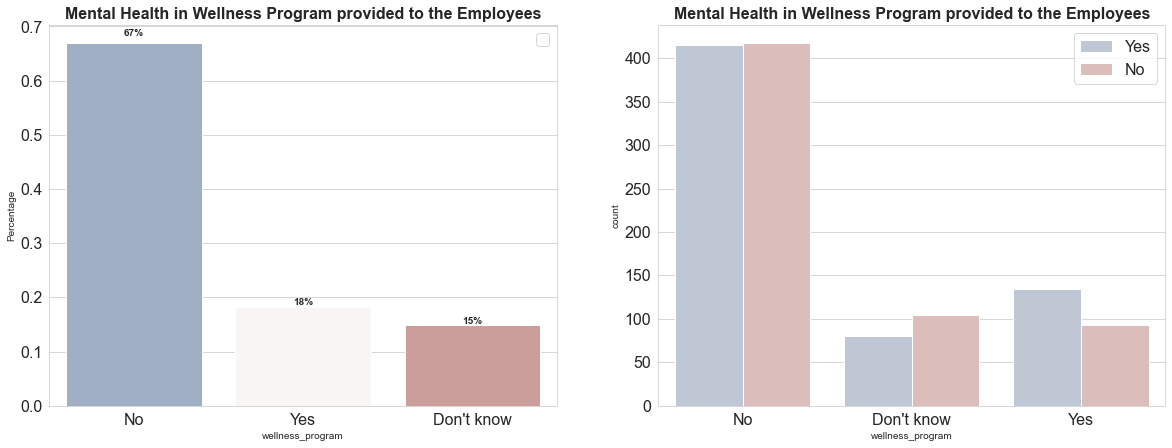

In [32]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
eda_percentage = df['wellness_program'].value_counts(normalize = True).rename_axis('wellness_program').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'wellness_program', y = 'Percentage', data = eda_percentage, palette='vlag')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Mental Health in Wellness Program provided to the Employees', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['wellness_program'], hue = df['treatment'], palette='vlag')
plt.title('Mental Health in Wellness Program provided to the Employees', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

No handles with labels found to put in legend.


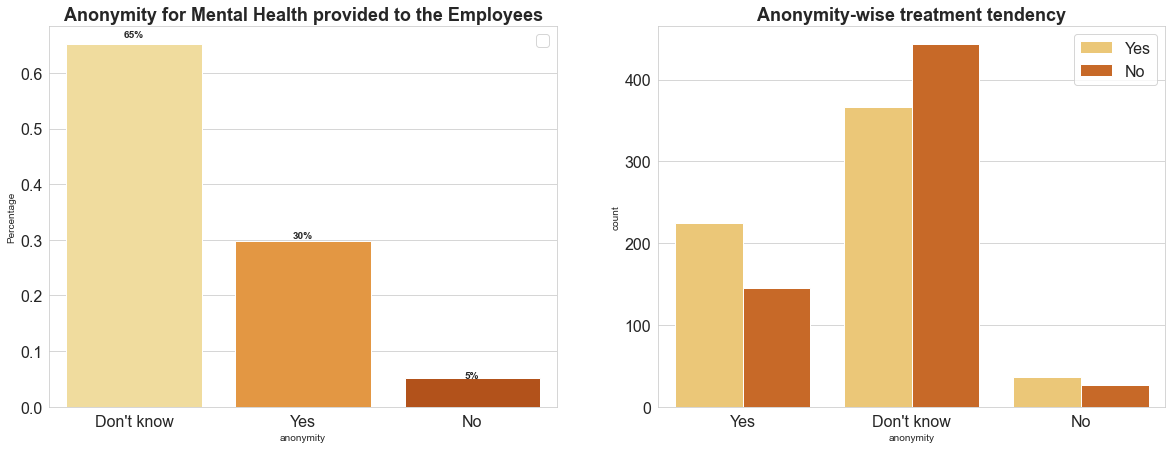

In [33]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
eda_percentage = df['anonymity'].value_counts(normalize = True).rename_axis('anonymity').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'anonymity', y = 'Percentage', data = eda_percentage, palette='YlOrBr')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Anonymity for Mental Health provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['anonymity'], hue = df['treatment'], palette='YlOrBr')
plt.title('Anonymity-wise treatment tendency', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

No handles with labels found to put in legend.


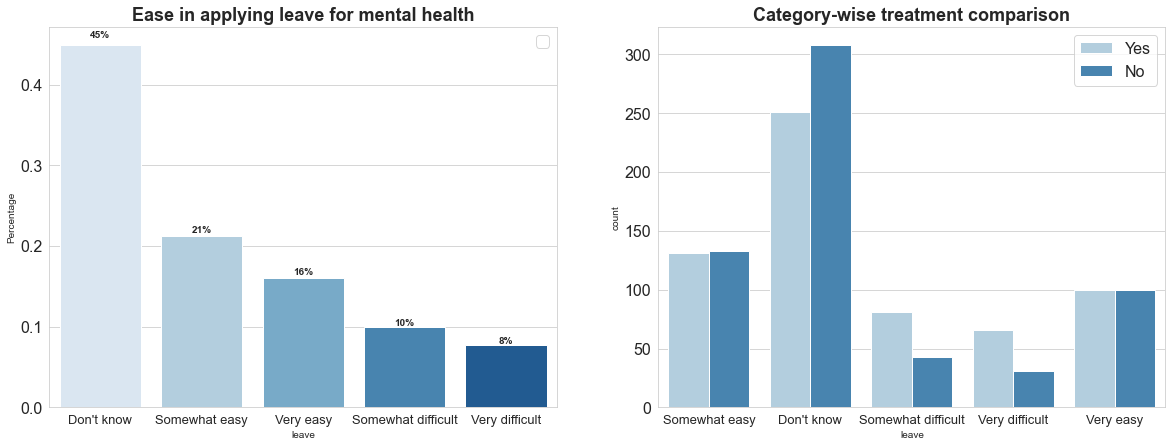

In [34]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
eda_percentage = df['leave'].value_counts(normalize = True).rename_axis('leave').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'leave', y = 'Percentage', data = eda_percentage, palette='Blues')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Ease in applying leave for mental health', fontsize=18, fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['leave'], hue = df['treatment'], palette='Blues')
plt.title('Category-wise treatment comparison', fontsize=18, fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

No handles with labels found to put in legend.


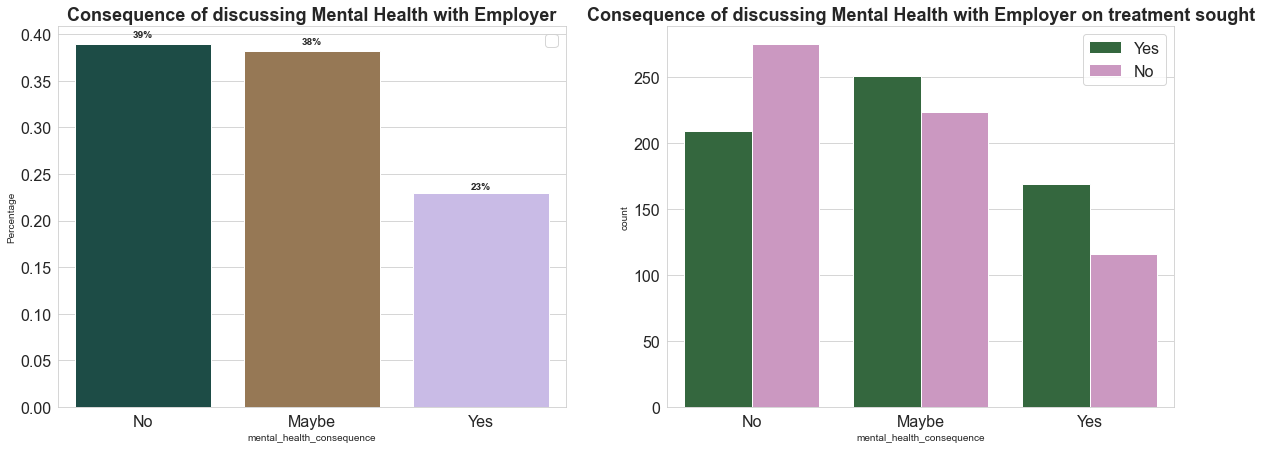

In [35]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
eda_percentage = df['mental_health_consequence'].value_counts(normalize = True).rename_axis('mental_health_consequence').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'mental_health_consequence', y = 'Percentage', data = eda_percentage, palette='cubehelix')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Consequence of discussing Mental Health with Employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['mental_health_consequence'], hue = df['treatment'], palette='cubehelix')
plt.title('Consequence of discussing Mental Health with Employer on treatment sought', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

No handles with labels found to put in legend.


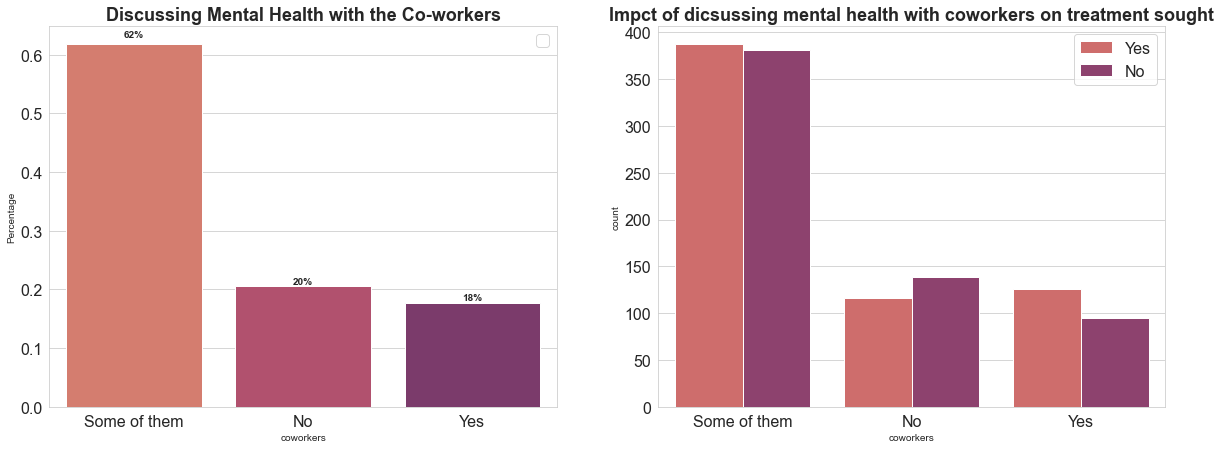

In [36]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
eda_percentage = df['coworkers'].value_counts(normalize = True).rename_axis('coworkers').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'coworkers', y = 'Percentage', data = eda_percentage, palette='flare')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Discussing Mental Health with the Co-workers', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['coworkers'], hue = df['treatment'], palette='flare')
plt.title('Impct of dicsussing mental health with coworkers on treatment sought', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

No handles with labels found to put in legend.


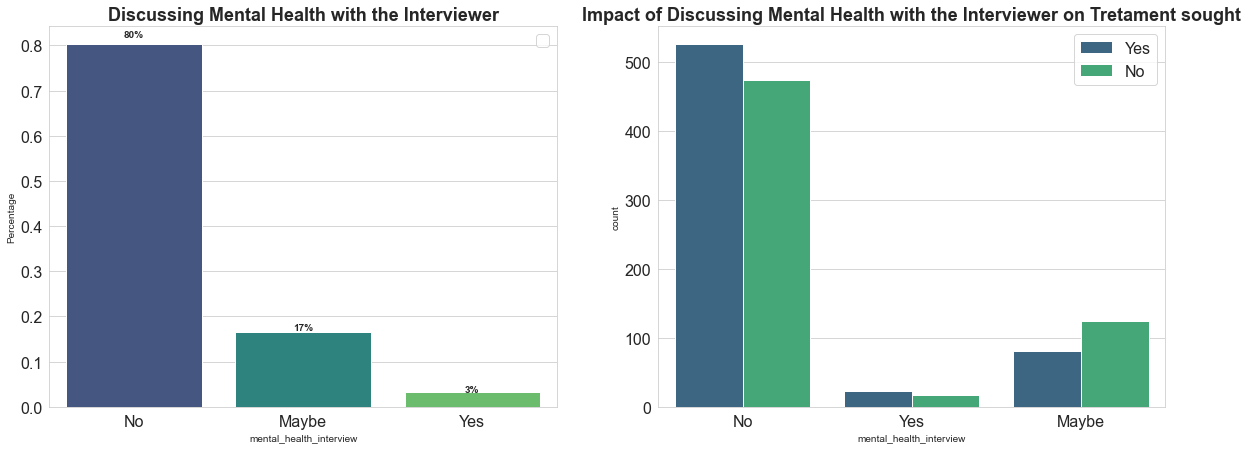

In [37]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
eda_percentage = df['mental_health_interview'].value_counts(normalize = True).rename_axis('mental_health_interview').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'mental_health_interview', y = 'Percentage', data = eda_percentage, palette='viridis')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Discussing Mental Health with the Interviewer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['mental_health_interview'], hue = df['treatment'], palette='viridis')
plt.title('Impact of Discussing Mental Health with the Interviewer on Tretament sought', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

No handles with labels found to put in legend.


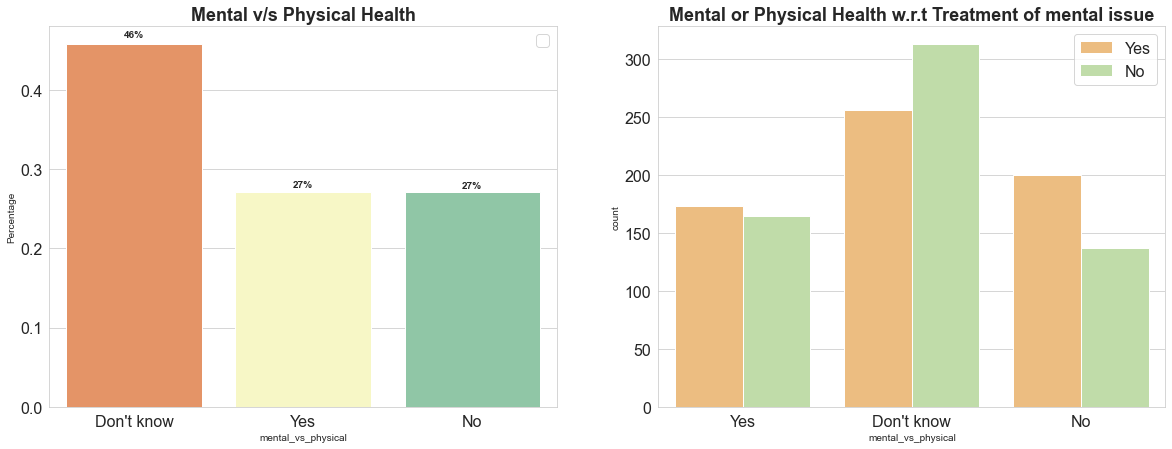

In [38]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
eda_percentage = df['mental_vs_physical'].value_counts(normalize = True).rename_axis('mental_vs_physical').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'mental_vs_physical', y = 'Percentage', data = eda_percentage, palette='Spectral')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Mental v/s Physical Health', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['mental_vs_physical'], hue = df['treatment'], palette='Spectral')
plt.title('Mental or Physical Health w.r.t Treatment of mental issue', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1244 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1244 non-null   object
 1   Age                        1244 non-null   int64 
 2   Gender                     1244 non-null   object
 3   Country                    1244 non-null   object
 4   self_employed              1244 non-null   object
 5   family_history             1244 non-null   object
 6   treatment                  1244 non-null   object
 7   work_interfere             1244 non-null   object
 8   no_employees               1244 non-null   object
 9   remote_work                1244 non-null   object
 10  tech_company               1244 non-null   object
 11  benefits                   1244 non-null   object
 12  care_options               1244 non-null   object
 13  wellness_program           1244 non-null   object
 14  seek_hel

In [40]:
df.isnull().sum()

Timestamp                    0
Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [41]:
df.shape

(1244, 25)

## Data Preprocessing

In [42]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [43]:
df=df.drop(['Timestamp', 'Country'], axis=1)
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,No,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,No,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,No,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,No,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,No,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [44]:
from sklearn.preprocessing import LabelEncoder
object_cols = ['Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1244 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        1244 non-null   int64
 1   Gender                     1244 non-null   int32
 2   self_employed              1244 non-null   int32
 3   family_history             1244 non-null   int32
 4   treatment                  1244 non-null   int32
 5   work_interfere             1244 non-null   int32
 6   no_employees               1244 non-null   int32
 7   remote_work                1244 non-null   int32
 8   tech_company               1244 non-null   int32
 9   benefits                   1244 non-null   int32
 10  care_options               1244 non-null   int32
 11  wellness_program           1244 non-null   int32
 12  seek_help                  1244 non-null   int32
 13  anonymity                  1244 non-null   int32
 14  leave                   

In [46]:
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,0,0,0,1,1,4,0,1,2,...,2,2,1,1,1,2,1,0,2,0
1,44,1,0,0,0,2,5,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,32,1,0,0,0,2,4,0,1,1,...,0,1,1,1,2,2,2,2,1,0
3,31,1,0,1,1,1,2,0,1,1,...,1,1,2,2,1,0,0,0,1,1
4,31,1,0,0,0,0,1,1,1,2,...,0,0,1,1,1,2,2,2,0,0


<AxesSubplot:>

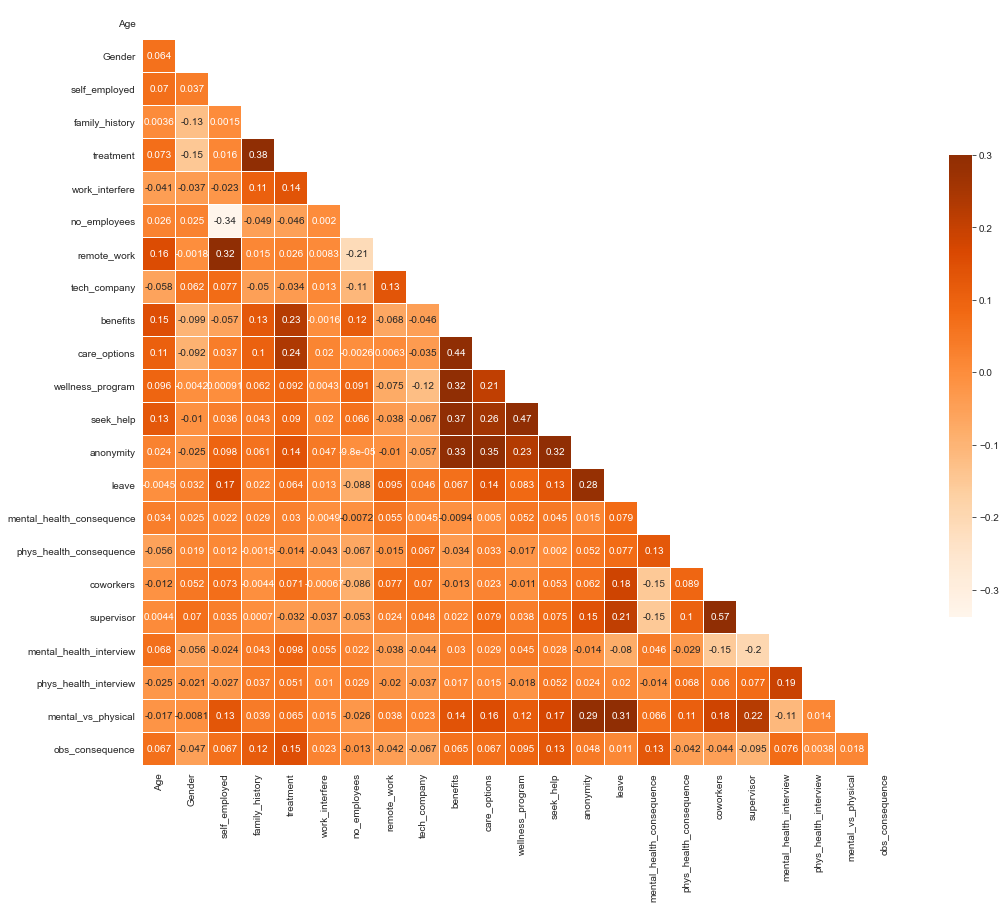

In [47]:
corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(17, 17))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='Oranges', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

In [48]:
df.no_employees.unique()

array([4, 5, 2, 1, 0, 3])

In [49]:
df.treatment.value_counts()

1    629
0    615
Name: treatment, dtype: int64

## Modelling

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, plot_roc_curve, confusion_matrix, classification_report, precision_recall_curve, auc, roc_curve
from sklearn.model_selection import train_test_split

In [51]:

X = df.drop('treatment', axis = 1)
y = df['treatment']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify = y,
                                                    test_size = 0.3,
                                                   random_state = 101)

In [52]:
y_train.size

870

In [53]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
print(logit_model.fit().summary2())

Optimization terminated successfully.
         Current function value: 0.561226
         Iterations 6
                             Results: Logit
Model:                  Logit              Pseudo R-squared:   0.190     
Dependent Variable:     treatment          AIC:                1020.5334 
Date:                   2022-08-28 19:45   BIC:                1125.4403 
No. Observations:       870                Log-Likelihood:     -488.27   
Df Model:               21                 LL-Null:            -602.98   
Df Residuals:           848                LLR p-value:        5.3653e-37
Converged:              1.0000             Scale:              1.0000    
No. Iterations:         6.0000                                           
-------------------------------------------------------------------------
                           Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
Age                       -0.0251   0.00

In [54]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [55]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.70


In [56]:
accuracy_score(y_test, y_pred)

0.7005347593582888

In [57]:
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[128,  57],
       [ 55, 134]], dtype=int64)

In [58]:
# Confusion matrix is given by:

# Predicted        No Treatment        Treatment
# Actual
# No Treatment         128                57
# Treatment             55                134    

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1244 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        1244 non-null   int64
 1   Gender                     1244 non-null   int32
 2   self_employed              1244 non-null   int32
 3   family_history             1244 non-null   int32
 4   treatment                  1244 non-null   int32
 5   work_interfere             1244 non-null   int32
 6   no_employees               1244 non-null   int32
 7   remote_work                1244 non-null   int32
 8   tech_company               1244 non-null   int32
 9   benefits                   1244 non-null   int32
 10  care_options               1244 non-null   int32
 11  wellness_program           1244 non-null   int32
 12  seek_help                  1244 non-null   int32
 13  anonymity                  1244 non-null   int32
 14  leave                   

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.69      0.70       185
           1       0.70      0.71      0.71       189

    accuracy                           0.70       374
   macro avg       0.70      0.70      0.70       374
weighted avg       0.70      0.70      0.70       374



Text(52.0, 0.5, 'ACTUAL')

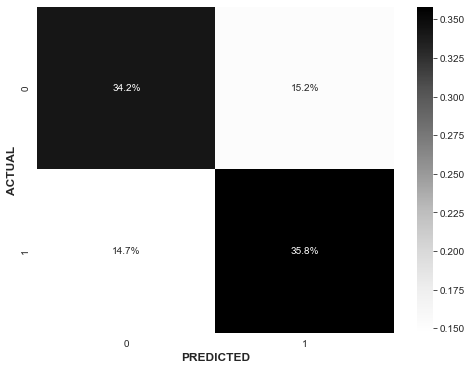

In [61]:
plt.figure(figsize = (8,6))
sns.heatmap(confusion_matrix(y_test, y_pred)/np.sum(confusion_matrix(y_test, y_pred)), fmt = '0.1%',annot=True, cmap = 'Greys')
#plt.title('Confusion Matrix of Logistic Regression Classifier', fontweight='bold', fontsize=16)
plt.xlabel('PREDICTED', fontweight='bold', fontsize=12)
plt.ylabel('ACTUAL', fontweight='bold', fontsize=12)

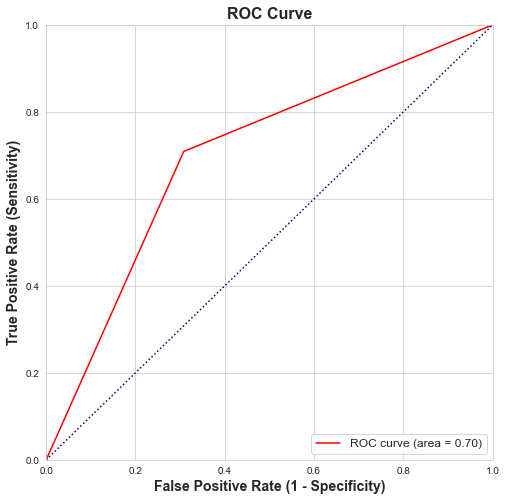

(array([0.        , 0.30810811, 1.        ]),
 array([0.        , 0.70899471, 1.        ]),
 array([2, 1, 0]))

In [62]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8,8))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='dotted')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve', fontweight = 'bold', fontsize=16)
plt.xlabel('False Positive Rate (1 - Specificity)', fontweight = 'bold', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontweight = 'bold', fontsize=14)
plt.legend(loc="lower right")
plt.show()
roc_curve(y_test, y_pred)

In [63]:
y_test.value_counts()

1    189
0    185
Name: treatment, dtype: int64

In [64]:
f1_score = 134/(134+.5*(57+55))
print('f1_Score for logit function is: {:0.2f}'.format(f1_score))

f1_Score for logit function is: 0.71


In [65]:
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

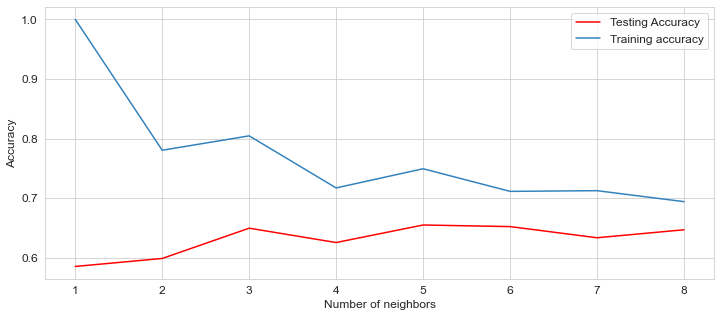

In [66]:
plt.figure(figsize = (12,5))
plt.plot(neighbors, test_accuracy, label='Testing Accuracy', color = 'Red')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [67]:
knn = KNeighborsClassifier(n_neighbors=5)

In [68]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [69]:
knn.score(X_test, y_test)

0.6550802139037433

In [70]:
y_pred = knn.predict(X_test)
print('Accuracy of kNN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of kNN classifier on test set: 0.66


In [71]:
confusion_matrix(y_test, y_pred)

array([[125,  60],
       [ 69, 120]], dtype=int64)

Text(51.0, 0.5, 'ACTUAL')

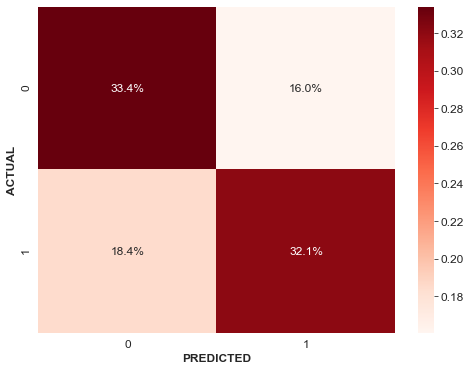

In [72]:
plt.figure(figsize = (8,6))
sns.heatmap(confusion_matrix(y_test, y_pred)/np.sum(confusion_matrix(y_test, y_pred)), fmt = '0.1%',annot=True, cmap = 'Reds')
#plt.title('Confusion Matrix of Logistic Regression Classifier', fontweight='bold', fontsize=16)
plt.xlabel('PREDICTED', fontweight='bold', fontsize=12)
plt.ylabel('ACTUAL', fontweight='bold', fontsize=12)

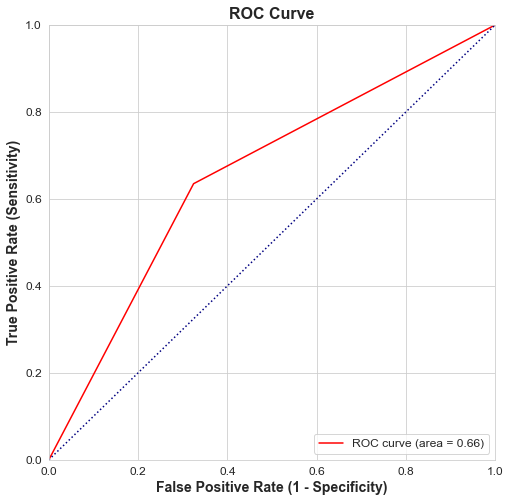

(array([0.        , 0.32432432, 1.        ]),
 array([0.        , 0.63492063, 1.        ]),
 array([2, 1, 0]))

In [73]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8,8))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='dotted')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve', fontweight = 'bold', fontsize=16)
plt.xlabel('False Positive Rate (1 - Specificity)', fontweight = 'bold', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontweight = 'bold', fontsize=14)
plt.legend(loc="lower right")
plt.show()
roc_curve(y_test, y_pred)

In [74]:
f1_score_2 = 120/(120+0.5*(69+60))
f1_score_2

0.6504065040650406

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [77]:
y_pred = clf_gini.predict(X_test)

In [78]:
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(clf_gini.score(X_test, y_test)))

Accuracy of decision tree classifier on test set: 0.72


In [79]:
confusion_matrix(y_test, y_pred)

array([[133,  52],
       [ 51, 138]], dtype=int64)

Text(51.0, 0.5, 'ACTUAL')

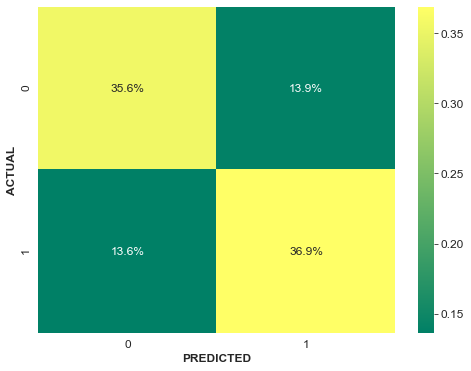

In [80]:
plt.figure(figsize = (8,6))
sns.heatmap(confusion_matrix(y_test, y_pred)/np.sum(confusion_matrix(y_test, y_pred)), fmt = '0.1%',annot=True, cmap = 'summer')
#plt.title('Confusion Matrix of Logistic Regression Classifier', fontweight='bold', fontsize=16)
plt.xlabel('PREDICTED', fontweight='bold', fontsize=12)
plt.ylabel('ACTUAL', fontweight='bold', fontsize=12)

In [81]:
round(accuracy_score(y_test, y_pred),2)

0.72

In [82]:
y_train_Acc = clf_gini.predict(X_train)

In [83]:
accuracy_score(y_train, y_train_Acc)

0.7505747126436781

[Text(502.20000000000005, 285.39000000000004, 'X[3] <= 0.5\ngini = 0.5\nsamples = 870\nvalue = [430, 440]'),
 Text(251.10000000000002, 203.85000000000002, 'X[4] <= 0.5\ngini = 0.461\nsamples = 538\nvalue = [344, 194]'),
 Text(125.55000000000001, 122.31, 'X[13] <= 2.5\ngini = 0.161\nsamples = 125\nvalue = [114, 11]'),
 Text(62.775000000000006, 40.76999999999998, 'gini = 0.114\nsamples = 99\nvalue = [93, 6]'),
 Text(188.32500000000002, 40.76999999999998, 'gini = 0.311\nsamples = 26\nvalue = [21, 5]'),
 Text(376.65000000000003, 122.31, 'X[9] <= 1.5\ngini = 0.494\nsamples = 413\nvalue = [230, 183]'),
 Text(313.875, 40.76999999999998, 'gini = 0.434\nsamples = 273\nvalue = [186, 87]'),
 Text(439.42500000000007, 40.76999999999998, 'gini = 0.431\nsamples = 140\nvalue = [44, 96]'),
 Text(753.3000000000001, 203.85000000000002, 'X[4] <= 0.5\ngini = 0.384\nsamples = 332\nvalue = [86, 246]'),
 Text(627.75, 122.31, 'X[0] <= 35.5\ngini = 0.403\nsamples = 25\nvalue = [18, 7]'),
 Text(564.975, 40.76999

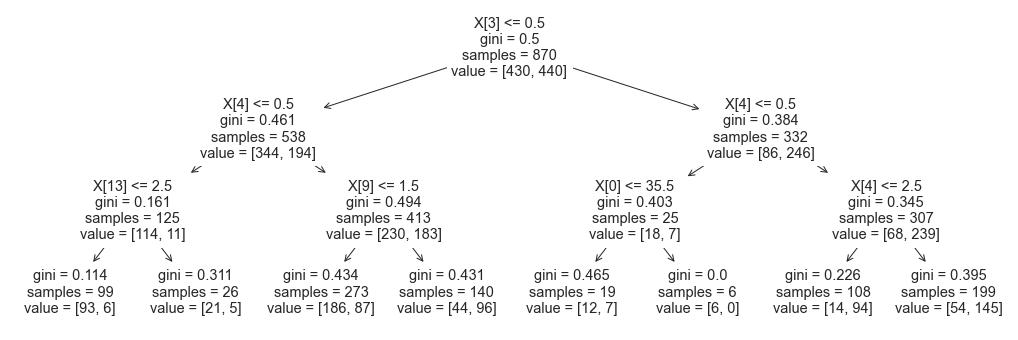

In [91]:
from sklearn import tree
plt.figure(figsize = (18,6))
tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [88]:
f1_score_3 = 138/(138+0.5*(51+52))
f1_score_3

0.7282321899736148

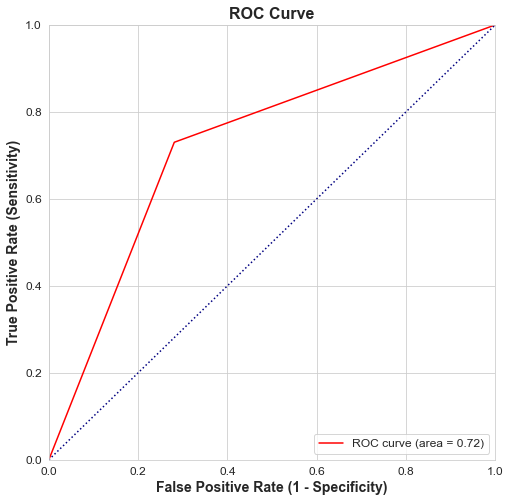

(array([0.        , 0.28108108, 1.        ]),
 array([0.        , 0.73015873, 1.        ]),
 array([2, 1, 0]))

In [89]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8,8))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='dotted')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve', fontweight = 'bold', fontsize=16)
plt.xlabel('False Positive Rate (1 - Specificity)', fontweight = 'bold', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontweight = 'bold', fontsize=14)
plt.legend(loc="lower right")
plt.show()
roc_curve(y_test, y_pred)

In [92]:
from sklearn import svm
classifier = svm.SVC(kernel='linear') # We set a SVM classifier, the default SVM Classifier (Kernel = Radial Basis Function)
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [93]:
y_pred = classifier.predict(X_test)

In [96]:
accuracy_score(y_test, y_pred)

0.7112299465240641

In [97]:
confusion_matrix(y_test, y_pred)

array([[133,  52],
       [ 56, 133]], dtype=int64)

Text(51.0, 0.5, 'ACTUAL')

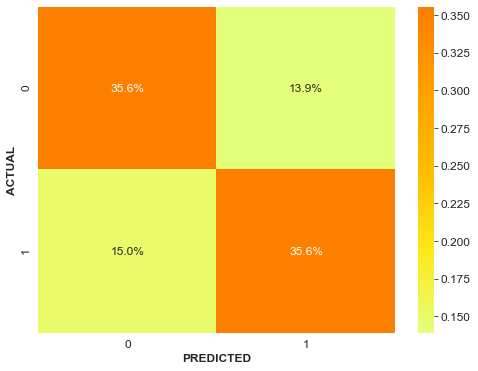

In [101]:
plt.figure(figsize = (8,6))
sns.heatmap(confusion_matrix(y_test, y_pred)/np.sum(confusion_matrix(y_test, y_pred)), fmt = '0.1%',annot=True, cmap = 'Wistia')
#plt.title('Confusion Matrix of Logistic Regression Classifier', fontweight='bold', fontsize=16)
plt.xlabel('PREDICTED', fontweight='bold', fontsize=12)
plt.ylabel('ACTUAL', fontweight='bold', fontsize=12)

In [102]:
f1_score_4 = 133/(133+0.5*(52+56))
f1_score_4

0.7112299465240641

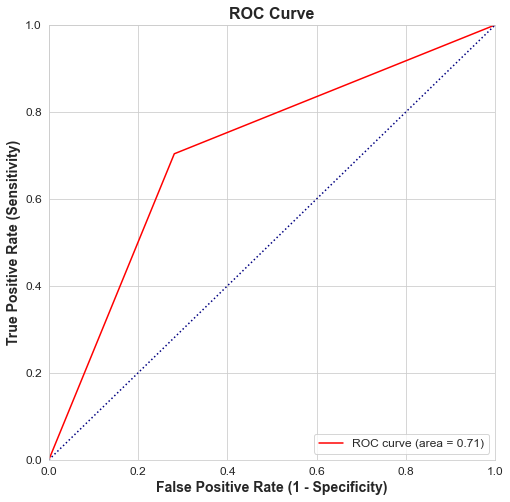

(array([0.        , 0.28108108, 1.        ]),
 array([0.       , 0.7037037, 1.       ]),
 array([2, 1, 0]))

In [103]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8,8))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='dotted')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve', fontweight = 'bold', fontsize=16)
plt.xlabel('False Positive Rate (1 - Specificity)', fontweight = 'bold', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontweight = 'bold', fontsize=14)
plt.legend(loc="lower right")
plt.show()
roc_curve(y_test, y_pred)

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, plot_roc_curve, confusion_matrix, classification_report, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
from sklearn import metrics

In [105]:
key = ['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier', 'SVM']
value = [LogisticRegression(), KNeighborsClassifier(n_neighbors = 5), DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0), svm.SVC(kernel='linear')]
models = dict(zip(key,value))
models

{'LogisticRegression': LogisticRegression(),
 'KNeighborsClassifier': KNeighborsClassifier(),
 'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=3, random_state=0),
 'SVM': SVC(kernel='linear')}

In [106]:
predicted =[]
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)

LogisticRegression 0.7005347593582888
KNeighborsClassifier 0.6550802139037433
DecisionTreeClassifier 0.7245989304812834
SVM 0.7112299465240641


In [118]:
predicted

[0.6550802139037433,
 0.7005347593582888,
 0.7112299465240641,
 0.7245989304812834]

In [123]:
models.items()

dict_items([('LogisticRegression', LogisticRegression()), ('KNeighborsClassifier', KNeighborsClassifier()), ('DecisionTreeClassifier', DecisionTreeClassifier(max_depth=3, random_state=0)), ('SVM', SVC(kernel='linear'))])

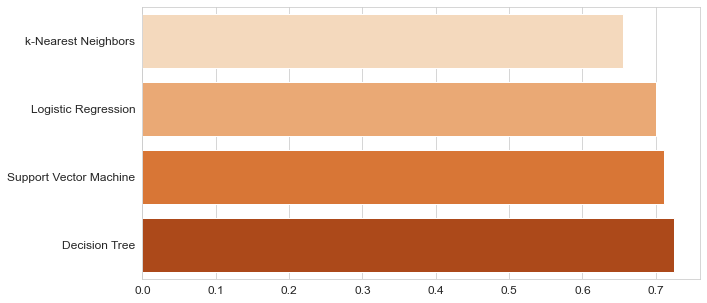

In [124]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x = predicted, y = ['k-Nearest Neighbors', 'Logistic Regression', 'Support Vector Machine', 'Decision Tree'],  palette='Oranges')


# x--x--x--x--x--x--x--x--x--x--x--THE END--x--x--x--x--x--x--x--x--x--x--x--x